---

# Training Multilayer perception (Geotag - Latent space mapping)

>This notebook contains code for training an MLP to control the latent space using geotags.
>Latent vectors are generated with audio files using the encoder.
>Their corresponding geotags are used as input and latent vectors as output to train the model.

---

In [1]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import IPython.display as ipd

## Dataset

### Load audio file path-geotag mappings

In [2]:
df = pd.read_csv('../corpus/mappings.csv')

In [3]:
df.head()

,path,lat,long
0,../corpus/audio/169884.mp3,0.501047,0.041804
1,../corpus/audio/169885.mp3,0.501052,0.041806
2,../corpus/audio/697381.mp3,0.187898,0.534158
3,../corpus/audio/187893.mp3,0.459852,0.012109
4,../corpus/audio/788102.mp3,0.236748,-0.876991


### Get input geotag

In [4]:
X = df[['lat', 'long']].to_numpy()

### Load latent vectors

In [5]:
latents = np.load('../corpus/latents.npy')

## Multilayer perceptron

In [6]:
mlp = tf.keras.Sequential(name='MLP')
mlp.add(layers.Input(shape=(2,)))
mlp.add(layers.Dense(64, activation='leaky_relu'))
mlp.add(layers.Dense(128, activation='leaky_relu'))
mlp.add(layers.Dense(256, activation='leaky_relu'))
mlp.add(layers.Dense(128, activation='tanh'))
mlp.add(layers.Dense(64, activation='tanh'))

In [7]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
Total params: 82,688
Trainable params: 82,688
Non-trainable params: 0
_________________________________________________________________


In [8]:
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error')

In [15]:
mlp.fit(X, latents, epochs=10, batch_size=latents.shape[0])

Epoch 1/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2922
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2923
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2920
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2921
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2921
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2923
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2922
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2924
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2922
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2921


## Test

In [16]:
decoder = load_model('../models/decoder.h5')

In [17]:
example_geotag = np.array([X[0]])

In [18]:
latent = mlp.predict(example_geotag)
audio = decoder.predict(latent)

1/1 [==============================] - 0s 41ms/step


In [19]:
ipd.display(ipd.Audio(data=audio, rate=44100))

In [20]:
mlp.save('../models/mlp.h5')

## Plot model

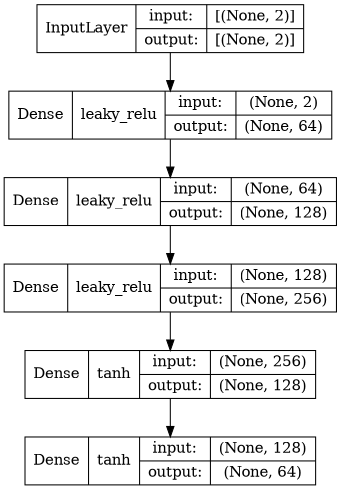

In [21]:
tf.keras.utils.plot_model(
    mlp,
    to_file='../plots/mlp.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    expand_nested=True,
    dpi=75,
    show_layer_activations=True
)